In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NearestNeighborsテスト

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X.shape

(6, 2)

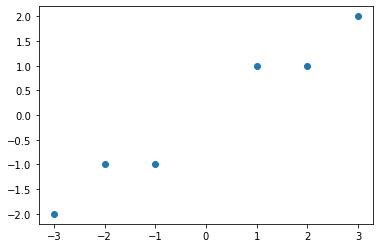

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [5]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [6]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [7]:
X = np.array([[-1, -1, 1], [-2, -1, 1], [-3, -2, 1], [1, 1, 1], [2, 1, 1], [3, 2, 1]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

# ヒストグラムテスト

In [8]:
# a = np.random.randn(1000)
a = np.random.randint(1, 101, (1000))
a[-1] = 101
a.shape

(1000,)

In [9]:
hist, bins = np.histogram(a, bins=10)

In [10]:
hist

array([119,  84,  97,  90,  91,  93, 103, 100, 113, 110])

In [11]:
bins

array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.])

<BarContainer object of 10 artists>

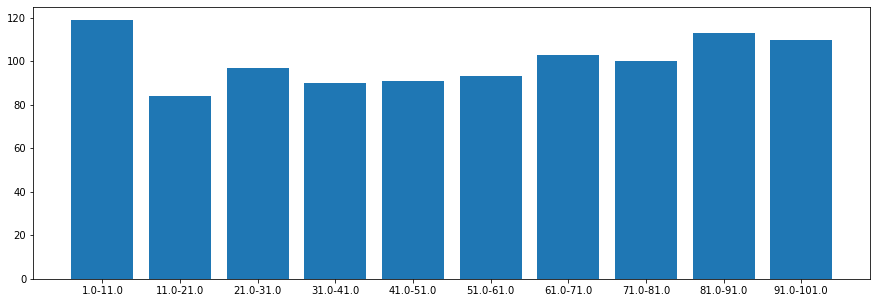

In [12]:
plt.figure(figsize=(15, 5))
plt.bar([f"{bins[i]}-{bins[i+1]}" for i in range(len(hist))], hist)

## RDF

In [13]:
dr = bins[1] - bins[0]
rho = a.shape[0]

In [14]:
rdf = hist/(4*np.pi*np.power(bins[:-1],2)*dr)
# rdf = hist
rdf

array([9.46971911e-01, 5.52438645e-03, 1.75034348e-03, 7.45262481e-04,
       4.30788216e-04, 2.84533059e-04, 2.20276258e-04, 1.57860487e-04,
       1.37056154e-04, 1.05706097e-04])

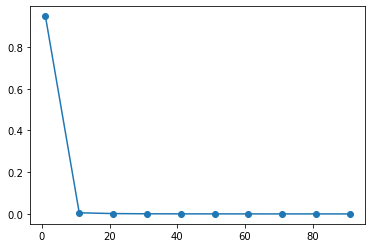

In [15]:
plt.plot(bins[:-1], rdf)
plt.scatter(bins[:-1], rdf)

# RDF

In [16]:
filepath = "input/xvg/2fs/MainChain-coord.xvg"
trj = pd.read_csv(filepath, comment='@', delimiter='\t',
                            header=None, skiprows=14).values[:, 1:]
trj = trj.reshape(trj.shape[0], -1, 3)

In [17]:
trj.shape

(101, 1235, 3)

In [18]:
struct = trj[0]

In [19]:
nbrs = NearestNeighbors(n_neighbors=struct.shape[0], algorithm='ball_tree').fit(struct)
distances, indices = nbrs.kneighbors(struct)

In [20]:
distances.shape

(1235, 1235)

In [21]:
#1nmに存在する他粒子との距離を計算し、ヒストグラムを作成
cutoff = 1.0
dist_list = []
for d,i in zip(distances,indices):
    d = d[np.where(d < cutoff)][1:]
#     break
    dist_list.extend(d)
dist_list = np.array(dist_list)


In [22]:
hist, bins = np.histogram(dist_list, bins=100)

## 試しに計算

In [23]:
dr = bins[1] - bins[0]
# rho = trj.shape[1]
rho = 1

In [24]:
rdf = hist/(4*np.pi*np.power(bins[:-1],2)*dr*rho)
# rdf = hist
rdf

array([370273.5151755 , 201635.28771343, 231748.77194594, 341617.39225701,
       116594.55308865,   2083.27055638,      0.        ,      0.        ,
            0.        ,      0.        ,   1711.23018651,  44829.85378393,
        71815.90682487,  98999.83700808, 199613.30048798,  79970.62419048,
        16486.5836968 ,  40431.18316566,  54222.26507501,  42240.75590908,
        32208.50182805,  36662.38698709,  35355.77659444,  27449.21277474,
        33826.82948996,  35241.66928508,  42173.37243123,  44527.79205622,
        34241.9208771 ,  39245.69003982,  45732.99848489,  30936.59013308,
        26309.59068479,  30480.2629516 ,  28064.45246929,  31878.59913798,
        38317.78731452,  42667.6486688 ,  37585.75018817,  32011.09494046,
        35222.82134907,  32679.23067971,  29992.10997991,  27254.52726329,
        23065.8878237 ,  22348.78767315,  24498.35049818,  25857.1835331 ,
        27546.3043151 ,  26012.04758923,  23982.39748083,  24809.71964866,
        21014.21629985,  

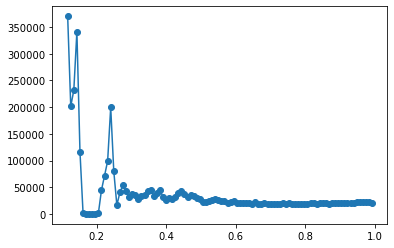

In [25]:
# RDF
plt.plot(bins[:-1], rdf)
plt.scatter(bins[:-1], rdf)

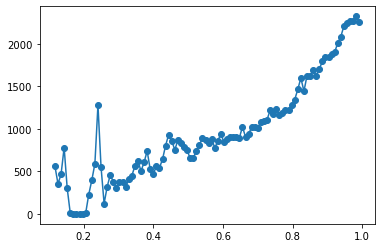

In [26]:
# 数
plt.plot(bins[:-1], hist)
plt.scatter(bins[:-1], hist)

# 原子種ごとに

In [27]:
trj.shape

(101, 1235, 3)

## gro parser

In [28]:
from utils01 import GROParser

In [29]:
gro = "input/solv_ions_prot.gro"
CUTOFF_RADIUS = 1.0

groparser = GROParser(gro, CUTOFF_RADIUS)
MAINCHAIN = groparser.mainchains
N_ATOMS = groparser.n_atoms
EACH_N_ATOMS = groparser.each_n_atoms
SLICE_INDECES = groparser.slice_indeces
ARRANGED_INDECES = groparser.arranged_indeces
ADJACENT_INDECES = groparser.adjacent_indeces
AB_INDECES = groparser.ab_indeces
ATOM_ALIGN = groparser.atom_align

## 関数

In [30]:
trj = trj[:, ARRANGED_INDECES, :]

In [82]:
def cal_rdf(trj, species, residues, cutoff=1.0, n_bins=100):
    all_distances = []
    for residue in residues:
        i, j = SLICE_INDECES[species[0]]
        center_coords = trj[:, i:j, :]
        center_coords = center_coords[:, residue, :]

        i, j = SLICE_INDECES[species[1]]
        nearby_coords = trj[:, i:j, :]
        
        center_coords = np.tile(center_coords, nearby_coords.shape[1]).reshape(center_coords.shape[0], -1, 3)

        distances = np.sqrt(np.sum(np.square(np.subtract(nearby_coords, center_coords)), axis=2)).flatten()
        distances = distances[distances<=cutoff]
        all_distances.extend(distances.tolist())
    
    hist, bins = np.histogram(all_distances, bins=n_bins)
    dr = bins[1] - bins[0]
    rho = 1
    rdf = hist/(4*np.pi*np.power(bins[:-1],2)*dr*rho)
    return bins[:-1], rdf

## テスト

In [84]:
species = ['CA', 'N']
residues = range(EACH_N_ATOMS[species[0]])
radiuses, rdf = cal_rdf(trj, species, residues)

## 各プロット

In [85]:
species_list = [
    ['CA', 'N'],
    ['CA', 'C'],
    ['N', 'CA'],
    ['N', 'C'],
    ['C', 'CA'],
    ['C', 'N'],
    ['C', 'O'],
    ['O', 'C']
]

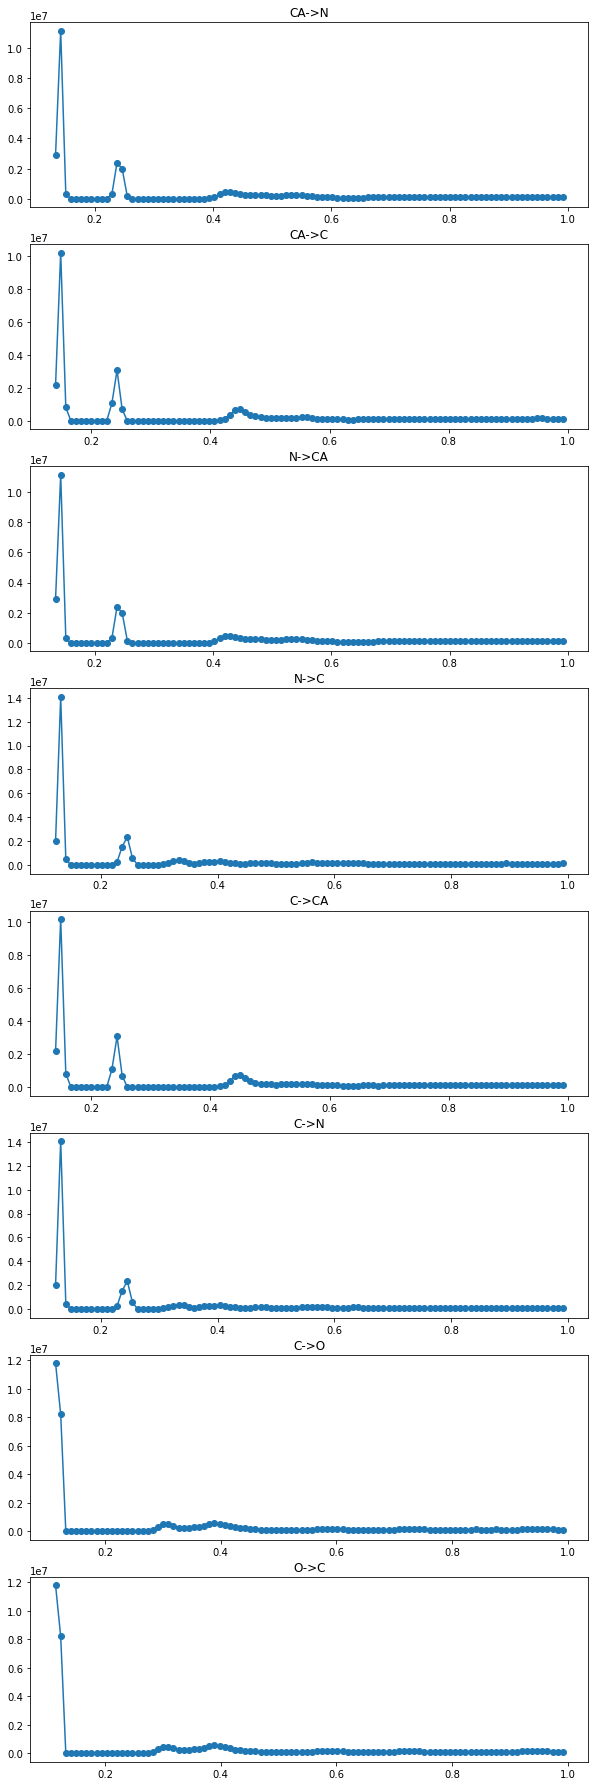

In [88]:
fig = plt.figure(figsize=(10,4*len(species_list)))

for i, species in enumerate(species_list):
    residues = range(EACH_N_ATOMS[species[0]])
    radiuses, rdf = cal_rdf(trj, species, residues)
    
    fig.add_subplot(len(species_list), 1, i+1)
    
    plt.plot(radiuses, rdf)
    plt.scatter(radiuses, rdf)
    
    plt.title(f"{species[0]}->{species[1]}")

## もしかして同じ対応のやつ一緒？

In [89]:
species = ['CA', 'N']
residues = range(EACH_N_ATOMS[species[0]])
radiuses1, rdf1 = cal_rdf(trj, species, residues)

species = ['N', 'CA']
residues = range(EACH_N_ATOMS[species[0]])
radiuses2, rdf2 = cal_rdf(trj, species, residues)

In [90]:
radiuses2 - radiuses1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
rdf2 - rdf1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

一緒だった！

## 改めてプロット

In [92]:
species_list = [
    ['CA', 'N'],
    ['CA', 'C'],
    ['N', 'C'],
    ['C', 'O'],
    ['CA', 'O'],
    ['N', 'O'],
]

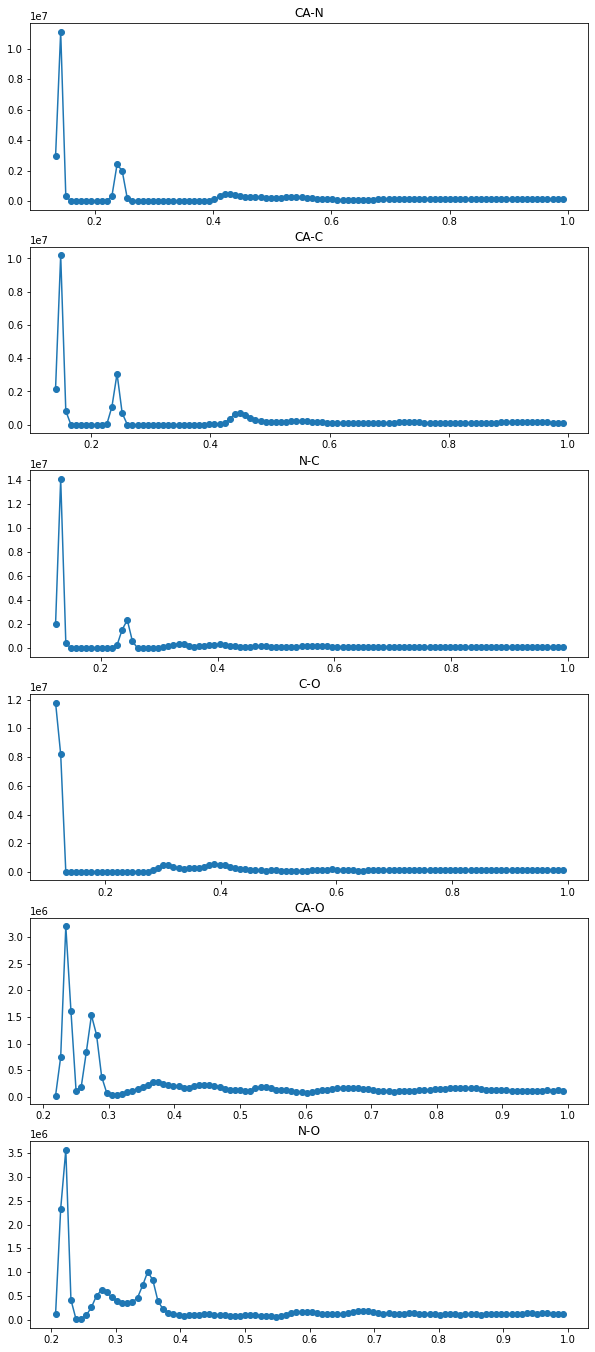

In [93]:
fig = plt.figure(figsize=(10,4*len(species_list)))

for i, species in enumerate(species_list):
    residues = range(EACH_N_ATOMS[species[0]])
    radiuses, rdf = cal_rdf(trj, species, residues)
    
    fig.add_subplot(len(species_list), 1, i+1)
    
    plt.plot(radiuses, rdf)
    plt.scatter(radiuses, rdf)
    
    plt.title(f"{species[0]}-{species[1]}")